In [514]:
import glob
import pathlib
import re
import pandas as pd
from matplotlib import pyplot as plt

In [588]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [449]:
def gen_score_dict(model_name, measure="Accuracy"):
    system_types = ["DCM", "DIT", "IRS"]
    df_scores = pd.DataFrame(columns=system_types)
    for system_type in system_types:
        paths = pathlib.Path(f"./{model_name}").glob(f"{system_type}_*.txt")
        for path in paths:
            n_cluster = int(path.stem.split("_")[1])
            result_dict = parse_text(path)
            score = result_dict.get(measure)
            if score:
                df_scores.loc[n_cluster, system_type] = score
    
    df_scores["ave"] = df_scores.mean(axis=1)
    return df_scores.sort_index()

In [444]:
re.findall("(.+)\s+:\s\t+([\d\.]+)\s.+", "Accuracy : 		0.480000 (264/550)")

[('Accuracy', '0.480000')]

In [552]:
class Aggregator:
    def __init__(self, model_name, measure="Accuracy"):
        self.model_name = model_name
        self.measure = measure
        self.df_scores = self._gen_score_dict(model_name, measure)
        
    def _gen_score_dict(self, model_name, measure):
        system_types = ["DCM", "DIT", "IRS"]
        df_scores = pd.DataFrame(columns=system_types)
        for system_type in system_types:
            paths = pathlib.Path(f"./{model_name}").glob(f"{system_type}_*.txt")
            for path in paths:
                n_cluster = int(path.stem.split("_")[1])
                result_dict = parse_text(path)
                score = result_dict.get(measure)
                if score:
                    df_scores.loc[n_cluster, system_type] = score

        df_scores["ave"] = df_scores.mean(axis=1)
        return df_scores.sort_index()
    
    def visualize(self,ylim=None):
        self.df_scores.drop("ave", axis=1).plot(ylim=ylim)
        self.df_scores["ave"].plot(style="--")
        plt.legend()
        plt.show()
    
    def __repr__(self):
        return str(self.df_scores)

In [445]:
def parse_text(path):
    result_dict = {}
    for line in path.open().readlines():
        matched = re.findall("(.+)\s+:\s\t+([\d\.]+)\s.*", line)
        #if len(split_row) == 2:
        #    result_dict[split_row[0].replace(":","").strip()] = float(split_row[1].split()[0])
        if len(matched):
            split_row = matched[0]
            result_dict[split_row[0]] = float(split_row[1])
    return result_dict

[]

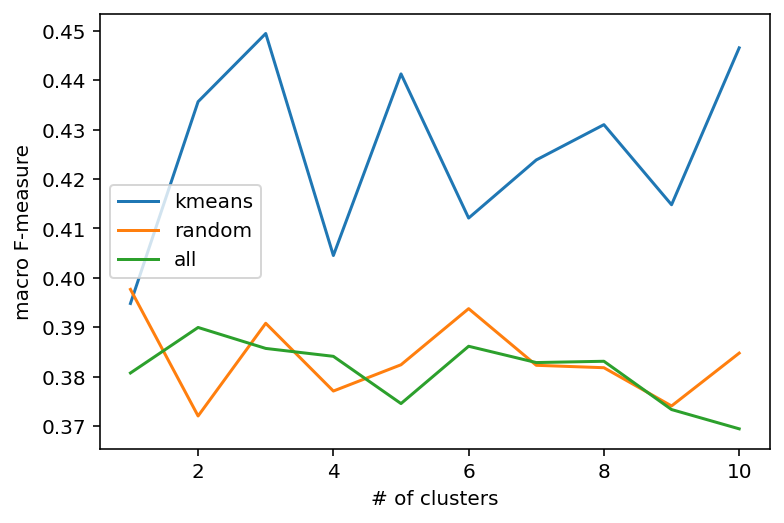

In [596]:
plt.figure()
Aggregator("kmeans_cnn", "F-measure macro").df_scores.ave.plot(label="kmeans")
Aggregator("random_cnn", "F-measure macro").df_scores.ave.plot(label="random")
Aggregator("all_cnn", "F-measure macro").df_scores.ave.plot(label="all")
plt.xlabel("# of clusters")
plt.ylabel("macro F-measure")
plt.legend()
plt.plot()

[]

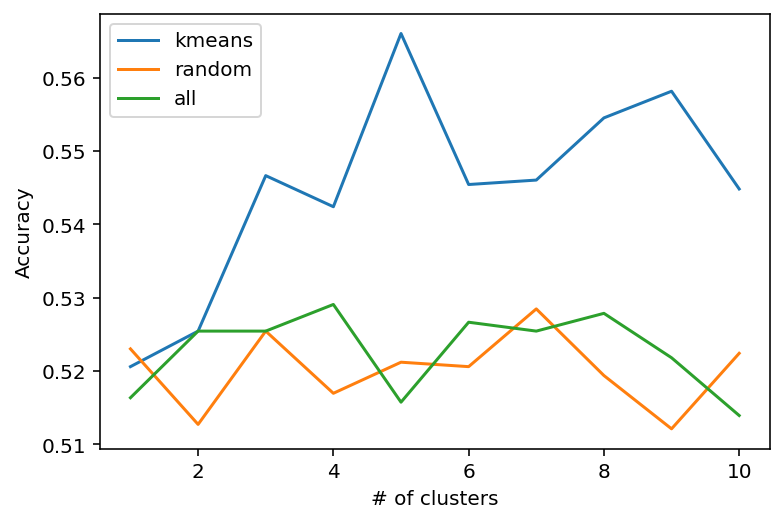

In [600]:
plt.figure()
Aggregator("kmeans_cnn", "Accuracy").df_scores.ave.plot(label="kmeans")
Aggregator("random_cnn", "Accuracy").df_scores.ave.plot(label="random")
Aggregator("all_cnn", "Accuracy").df_scores.ave.plot(label="all")
plt.xlabel("# of clusters")
plt.ylabel("Accuracy")
plt.legend()
plt.plot()

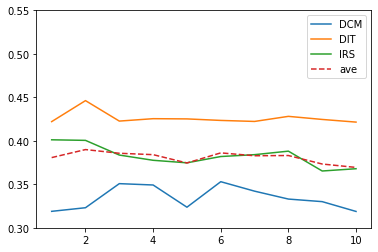

In [555]:
Aggregator("all_cnn", "F-measure macro").visualize(ylim=(0.3,0.55))

In [122]:
gen_score_dict("kmeans_cnn").ave.idxmax()

5

In [123]:
gen_score_dict("kmeans_lstm").ave.idxmax()

5

In [72]:
data = """######### Data Stats #########
File Num : 		50
System Utterance Num : 	550
O Label Num : 		223
T Label Num : 		149
X Label Num : 		178

######### Results #########
Accuracy : 		0.478182 (263/550)

Precision (X) : 	0.569620 (45/79)
Recall    (X) : 	0.252809 (45/178)
F-measure (X) : 	0.350195

Precision (T+X) : 	0.852941 (87/102)
Recall    (T+X) : 	0.242340 (87/359)
F-measure (T+X) : 	0.377440

JS divergence (O,T,X) : 	0.122709
JS divergence (O,T+X) : 	0.095883
JS divergence (O+T,X) : 	0.070033

Mean squared error (O,T,X) : 	0.069083
Mean squared error (O,T+X) : 	0.102386
Mean squared error (O+T,X) : 	0.075390
###########################"""

In [234]:
df = pd.read_csv("./data/maxpmi/data_undersampled.csv",index_col=0)

In [560]:
185/(185 + 115)

0.6166666666666667

In [238]:
y_trues = df.label
y_preds = ["X"] * len(y_trues)
print("f(X):",f1_score(y_trues, y_preds, pos_label="X", average="binary"))
print("f_micro:",f1_score(y_trues, y_preds, pos_label="X", average="micro"))
print("f_macro:",f1_score(y_trues, y_preds, pos_label="X", average="macro"))

f(X): 0.6666666666666666
f_micro: 0.5
f_macro: 0.3333333333333333


In [236]:
y_trues = df.label
y_preds = ["O"] * len(y_trues)
print("f(X):",f1_score(y_trues, y_preds, pos_label="X", average="binary"))
print("f_micro:",f1_score(y_trues, y_preds, pos_label="X", average="micro"))
print("f_macro:",f1_score(y_trues, y_preds, pos_label="X", average="macro"))

f(X): 0.0
f_micro: 0.5
f_macro: 0.3333333333333333


In [228]:
total = 0
for i in range(100):
    y_preds = random.choices(["O", "X"], k=len(y_trues))
    total += f1_score(y_true=y_trues, y_pred=y_preds, pos_label="X",average="macro")
total/100

0.4930218424170707

In [177]:
y_trues.value_counts()

X    185
O    115
Name: label, dtype: int64

In [ ]:
TP = 

In [178]:
prec_O = TP / (TP + FP)
rec_O = TP / (TP + FN)
prec_X = TN / (TN + FN)
rec_X = TN / (TN + FP)

NameError: name 'TP' is not defined

In [186]:
0.5 * p_O + 0.5 * p_X

0.5

In [183]:
p_X = 185 / (115 + 185)

In [184]:
p_O = 115 / (115 + 185)

In [297]:
import numpy as np

In [299]:
coefs = [4,6,8]
s = 352

In [302]:
x = np.zeros(len(sorted_coefs))

In [425]:
def solve(coefs, s, min_sols=None, sum_c=None):
    sorted_coefs, orig_indices = zip(*sorted(zip(coefs, range(len(coefs))), reverse=True))
    results = []
    
    def _f(coefs, s, _tmp=list(), min_sols=None, sum_c=None):
        if len(coefs) == 1:
            if s % coefs[0] == 0:
                result = _tmp + [s // coefs[0]]
                if sum_c==None or sum(result) == sum_c:
                    result = [result[idx] for idx in orig_indices]
                    results.append(result)
            else:
                pass
        else:
            if min_sols:
                cands = list(range(min_sols[0], s // coefs[0] + 1))
            else:
                cands = list(range(s // coefs[0] + 1))
            for cand in cands:
                _f(coefs[1:], s - cand * coefs[0], _tmp + [cand], min_sols[1:] if type(min_sols)==list else None, sum_c)
    
    _f(sorted_coefs, s, [], min_sols, sum_c)
    return np.array(results)

In [416]:
solve([4,6,8], 352, sum_c=65)

array([[19, 46,  0],
       [20, 44,  1],
       [21, 42,  2],
       [22, 40,  3],
       [23, 38,  4],
       [24, 36,  5],
       [25, 34,  6],
       [26, 32,  7],
       [27, 30,  8],
       [28, 28,  9],
       [29, 26, 10],
       [30, 24, 11],
       [31, 22, 12],
       [32, 20, 13],
       [33, 18, 14],
       [34, 16, 15],
       [35, 14, 16],
       [36, 12, 17],
       [37, 10, 18],
       [38,  8, 19],
       [39,  6, 20],
       [40,  4, 21],
       [41,  2, 22],
       [42,  0, 23]])

In [419]:
solve([4,6,8], 56, sum_c=7)

array([[0, 0, 7]])

In [420]:
solve([4,6,8], 56, sum_c=8)

array([[0, 4, 4],
       [1, 2, 5],
       [2, 0, 6]])

In [422]:
solve([4,6,8], 120, sum_c=20)

array([[ 0, 20,  0],
       [ 1, 18,  1],
       [ 2, 16,  2],
       [ 3, 14,  3],
       [ 4, 12,  4],
       [ 5, 10,  5],
       [ 6,  8,  6],
       [ 7,  6,  7],
       [ 8,  4,  8],
       [ 9,  2,  9],
       [10,  0, 10]])

In [440]:
solve([4,6,8], 64, sum_c=16)

array([[16,  0,  0]])

In [441]:
solve([4,6,8], 56, sum_c=14)

array([[14,  0,  0]])